# Python Programming and Big-Data

- This notebook contains a very accelerated summary of the basics of python. If this is challenging, please refer to the textbook sections.
- Being able to successfully run this also means you have a working Python environment! You now have installed everything you need to run this course.


## Python Basics

In [75]:
# Comments: The hashtag makes the rest of the line a comment. The more programming you do, the more you focus on making good comments.
# Jupyter lets you write formatted text, but you'll still want to put comments in the raw python.

# Assign some text (a string) to a variable
some_text = 'This is the text.'

# Assign some numbers to variables
a = 5  # Here, we implicitly told python that a is an integer
b = 4.6  # Here, we told python that b is a floating point number (a decimal)

- Even though nothing is outputted above, our Python "Kernel" has the values to each variable stored for later use.

### Important note: Python is not a "typed" language

- Notice that above, we added an integer and the float (a floating point number, i.e., one with a decimal point). Python "smartly" redefines variables so that they work together.

- This is different from other languages which require you to manually manage the "types" of your variables.

In [76]:
# Python as a calculator. 
sum_of_two_numbers = a + b
# Printing output to the console
print('Our output was', sum_of_two_numbers)

Our output was 9.6


- In the above, you'll notice the result was a float.
- If needed, you can demand that python specify something as a certain type, as below.

In [77]:
sum_as_int = int(sum_of_two_numbers)
sum_as_int_back_to_float = float(sum_as_int)

print('We lost some precision in this operation:', sum_as_int_back_to_float)

We lost some precision in this operation: 9.0



## Defining functions

In [78]:


# Functions
def my_function(input_parameter_1, input_parameter_2):
    product = input_parameter_1 * input_parameter_2
    return product

# Use the function
value_returned = my_function(2, 7)
print(value_returned)

14


## Importing packages

In [79]:

# Built-in packages via the Python Standard Library
import math
import os, sys, time, random

# Using imported modules
number_rounded_down = math.floor(sum_of_two_numbers)
print(number_rounded_down)


9


In [80]:


# Using packages from elsewhere

# When we used Mambaforge, we installed a ton of packages. Here we will import them into our notebook to use.

import numpy as np # The as just defines a shorter name

# Create an 2 by 3 array of random integer
low = 3
high = 8
size = (2, 3)
small_array = np.random.randint(low, high, size)
print('Here\'s a small numpy array\n', small_array)

# Sidenote: from above backspace \ put in front of a character is the
# "escapce character," which makes python interpret the next thing as a string or special text operator. \n makes a line break


Here's a small numpy array
 [[4 7 5]
 [5 3 3]]


## Reading a geotiff as a raster

The workhorse library at the heart of open-source earth analytics is GDAL (Geospatial Data Abstraction Library). It can read almost any spatial raster type. We're going to use it to load a raster from Johnson et al. 2014.

In [81]:

# Load a geotiff as a numpy array using GDAL

from osgeo import gdal
geotiff_filename = 'crop_production_tons_per_cell.tif'
data_directory = '../../../Data'
geotiff_filename = os.path.join(data_directory, geotiff_filename)
contents = os.listdir(data_directory)
print(contents)


['assignment_06.zip', 'Production_Crops_E_All_Data_(Normalized).zip', 'gtap_invest', 'assignment_5', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7.tif', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7.tif.aux.xml', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2010-v2.0.7.tif.ovr', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif.aux.xml', 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7.tif.ovr', 'landsat.zip', 'maize_HarvAreaYield_Geotiff.zip', 'maize_HarvestedAreaFraction.tif', 'maize_HarvestedAreaFraction.tif.aux.xml', 'maize_HarvestedAreaFraction.tif.ovr', 'maize_HarvestedAreaHectares.tif', 'maize_HarvestedAreaHectares.tif.aux.xml', 'maize_HarvestedAreaHectares.tif.ovr', 'maize_Production.tif', 'maize_Production.tif.aux.xml', 'maize_Production.tif.ovr', 'maize_YieldPerHectare.tif', 'maize_YieldPerHectare.tif.aux.xml', 'maize_YieldPerHectare.tif.ovr', 'MN-geospatial.zip', 'ne_110m_admin_0_countries.cpg', 'ne_110m_admin_0_countries.dbf', 'ne_110m_admin_0_coun

In [82]:

# First, open the gdal dataset
crop_production_tons_per_cell = gdal.Open(geotiff_filename)
print(crop_production_tons_per_cell)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002472EED2C70> >


In [83]:

# The dataset object holds information about the area and extent of the data, or the geotransform information
geotransform = crop_production_tons_per_cell.GetGeoTransform()
projection = crop_production_tons_per_cell.GetProjection()
print('GDAL dataset geotransform', geotransform)


GDAL dataset geotransform (-180.0, 0.0833333333333286, 0.0, 89.99999999998977, 0.0, -0.0833333333333286)


In [84]:


# IMPORTANT ANNOYING NOTE: in programming, there are different conventions for identifying a place by rows, cols vs. x, y vs. upper-left, lower-right, etc.
# Numpy is denoted row, col but gdal is denoted X, Y (which flips the order). Just memorize that row = Y and col = X.

n_rows = crop_production_tons_per_cell.RasterYSize
print('Number of rows in a GDAL dataset', n_rows)

n_cols = crop_production_tons_per_cell.RasterXSize
print('Number of columns in a GDAL dataset', n_cols)

# Next, get the "band" of the dataset. Many datasets have multiple layers (e.g. NetCDFs).
# Geotiffs only have 1 band by default, so we just grab band 1
carbon_conserved_band = crop_production_tons_per_cell.GetRasterBand(1)

# The band object has information too, like the datatype of the geotiff:
data_type = carbon_conserved_band.DataType
no_data_value = carbon_conserved_band.GetNoDataValue()

# Finally, we can get the array from the band as a numpy array:
c = carbon_conserved_band.ReadAsArray()
shape = c.shape

print('Look at the array itself', c)
print('Add up the array', np.sum(c))


Number of rows in a GDAL dataset 2160
Number of columns in a GDAL dataset 4320
Look at the array itself [[-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]
 ...
 [-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]
 [-255. -255. -255. ... -255. -255. -255.]]
Add up the array 6241604554.860037


## High-performance computing with Numpy

In [85]:
# Make a copy in memory for us to play with. NOTE that if we just did c_view = c and then modified c_view, the c array would also be changed.
c_view = c # This only creates a new pointer to the same block of memory on your computer that holds the array. If we change c_view, c will also be changed.
c_calcs = c.copy() # This gives us a NEW array in a new block of memory, so changing c_calcs will not change c.

# Get specific elements in the array with [row, col]
specific_value = c_calcs[400, 500]

# Or you can get values between a range of rows and cols with :
chunk_of_array = c_calcs[1000:1100, 1600:1700] # This would give you a 100 by 100 subarray

print(chunk_of_array)


[[-255.         -255.         -255.         ... -255.
  -255.         -255.        ]
 [-255.         -255.         -255.         ... -255.
  -255.         -255.        ]
 [-255.         -255.         -255.         ... -255.
  -255.         -255.        ]
 ...
 [4053.17534645 2424.65772999 2309.56214063 ... -255.
  -255.         -255.        ]
 [2340.01283536  934.6991384  1301.41934136 ... -255.
  -255.         -255.        ]
 [1104.33726845    0.          380.04900385 ... -255.
  -255.         -255.        ]]


In [86]:
print(chunk_of_array.shape)

(100, 100)


In [87]:

# Or you can select out a subset of the array based on a logic conditional
conditional_subset = c_calcs[c_calcs>10000]

# Note that when we took the conditional subset, the array dimensions no longer made sense (there now are unspecified missing locations).
# Numpy deals with this by flattening the array to 1 dimension.
print('conditional_subset shape', conditional_subset.shape)


conditional_subset shape (231093,)


In [88]:

# But, if we don't save it as a new array (and do something like reassigning values), it retains the array's shape.
# print('Sum of c_calcs before changing values', np.sum(c_calcs))

# Change all values in c_calcs that are > 10000 to 22 IN-PLACE (i.e., changes the underlying c_calcs array).
c_calcs[c_calcs>10000] = 22
print('Sum of c_calcs after changing values', np.sum(c_calcs))


Sum of c_calcs after changing values -195641246.3809901


In [89]:

# Set c_calcs back to the original by taking a new copy
c_calcs = c.copy()

# If you dont want to overwrite c_calcs, the above method won't work unless you create another copy first.
d = c_calcs.copy()

d[(d > 200) & (d < 10000)] = 33 # Note, unlike vanilla python, Numpy conditionals here must use & and must be in parenthases.
print('The sum of d after we messed with it', np.sum(d))


The sum of d after we messed with it 4654336982.408939


## Plotting an array

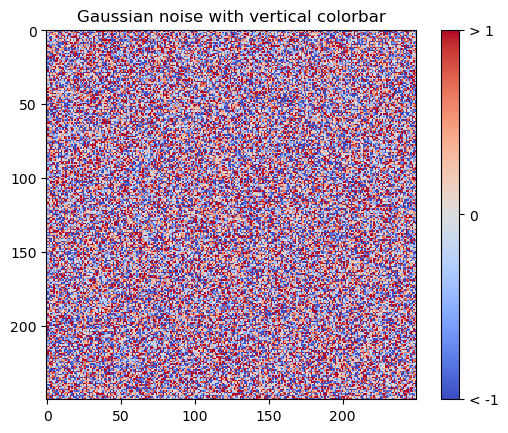

In [90]:

# Sightly more complex example
# Create a new figure and axes.
fig, ax = plt.subplots()

# Make up some data
data = np.clip(np.random.randn(250, 250), -1, 1)

# Use the axes object to show the data with a coolwarm colorbar
cax = ax.imshow(data, interpolation='nearest', cmap=matplotlib.cm.coolwarm)

# Give a title to the axis.
ax.set_title('Gaussian noise with vertical colorbar')

# Add a colorbar to  the figure
cbar = fig.colorbar(cax, ticks=[-1, 0, 1]) # Add colorbar, make sure to specify tick locations to match desired ticklabels

# Modify the axes within the colorbar
cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

# Show it.
plt.show()

In [91]:

# Save the as a new geotiff to disk

# Create a new filename for our output file. The + concatenates things. Str() makes the number a string.
# This is one of those cases where python wouldn't correctly guess the data type
output_filename = 'gdal_created_array_' + str(random.randint(1, 1000000)) + '.tif'
output_path = os.path.join(data_directory, output_filename)

# Create a new file at that filename location using the attributes we used above
# Notice that we flipped n_cols and n_rows from how numpy would have wanted it.
output_dataset = gdal.GetDriverByName('GTiff').Create(output_path, n_cols, n_rows, 1, data_type)

# Set dataset-level information
output_dataset.SetGeoTransform(geotransform)
output_dataset.SetProjection(projection)

# Now get a band from our new dataset on which we'll write our array.
output_band = output_dataset.GetRasterBand(1)

# Do the array writing
output_band.WriteArray(d)

# Set any final band-level information
output_band.SetNoDataValue(no_data_value)


0

## Pandas!

In [92]:

import pandas

food_prices_filename = 'world_monthly_food_prices.csv'
food_prices_path = os.path.join(data_directory, food_prices_filename)
food_prices = pandas.read_csv(food_prices_path)

print('Whole dataframe:', food_prices)


Whole dataframe:                                      Domain Code                  Domain  \
0                                             CP  Consumer Price Indices   
1                                             CP  Consumer Price Indices   
2                                             CP  Consumer Price Indices   
3                                             CP  Consumer Price Indices   
4                                             CP  Consumer Price Indices   
..                                           ...                     ...   
176                                           CP  Consumer Price Indices   
177                                           CP  Consumer Price Indices   
178                                           CP  Consumer Price Indices   
179                                           CP  Consumer Price Indices   
180  FAOSTAT Date: Wed Aug 17 16:12:56 CEST 2016                     NaN   

     AreaCode AreaName  ElementCode ElementName  ItemCode  \
0      50

In [93]:
print('List of column names:', food_prices.columns)


List of column names: Index(['Domain Code', 'Domain', 'AreaCode', 'AreaName', 'ElementCode',
       'ElementName', 'ItemCode', 'ItemName', 'Year', 'Value', 'Flag',
       'FlagD'],
      dtype='object')


In [94]:
print('Specific column:', food_prices['Value'])


Specific column: 0       99.5
1      101.5
2      106.5
3      112.5
4      119.2
       ...  
176    210.3
177    224.2
178    239.0
179    250.9
180      NaN
Name: Value, Length: 181, dtype: float64


In [95]:
print('Specific value in that column:', food_prices['Value'][6])


Specific value in that column: 132.2


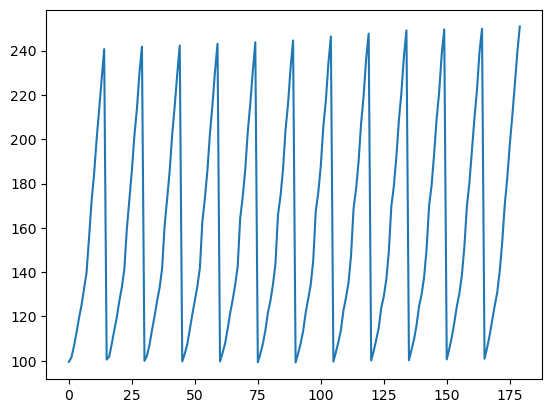

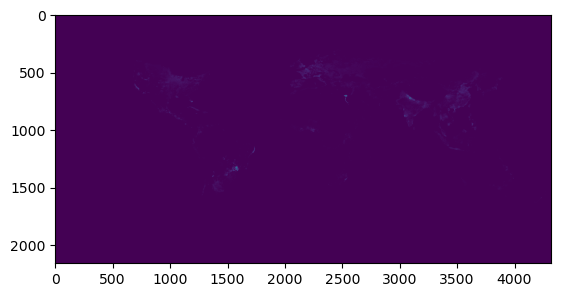

In [96]:

import matplotlib
from matplotlib import pyplot as plt
plt.plot(food_prices['Value'])
plt.show() 